In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import scipy.stats
#%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns


# **Features Selection**


In [ ]:
base_path = os.getcwd().replace('notebooks', '')
print(base_path)
subthreshold_data = pd.read_pickle(os.path.join(base_path,"Data/subthreshold_data.pkl"))
motor_nocontact_data = pd.read_pickle(os.path.join(base_path,"Data/Motor_nocontact_data.pkl"))
motor_contact_data = pd.read_pickle(os.path.join(base_path,"Data/Motor_contact_data.pkl"))


/Users/lilly-flore/Desktop/Master-NX/Neuroscience-BIO482/MP-Neurophysiological_data_analysis/NCCM_project


In [87]:
display(subthreshold_data.columns)
subthreshold_data.head()

Index(['cell_id', 'cell_type', 'firing_rate', 'ap_threshold', 'ap_duration',
       'mean_vm', 'std_vm', 'fft_low', 'fft_high'],
      dtype='object')

,cell_id,cell_type,firing_rate,ap_threshold,ap_duration,mean_vm,std_vm,fft_low,fft_high
0,AP032_1,EXC,0.875000,-0.040795,0.608929,-0.064378,0.005948,0.000763,0.000070
1,AP032_2,EXC,1.857143,-0.040812,0.993269,-0.056189,0.005208,0.000635,0.000090
2,AP035_1,EXC,2.100000,-0.037562,0.786111,-0.058273,0.006374,0.000775,0.000053
3,AP035_2,EXC,0.900000,-0.031695,0.849537,-0.055222,0.006061,0.000837,0.000069
4,AP039_1,EXC,0.566667,-0.040215,0.866176,-0.060517,0.004220,0.000513,0.000054


In [90]:
display(subthreshold_data.shape)
neuron_1 = pd.DataFrame(subthreshold_data.groupby('cell_id'))
neuron_1.shape

(232, 9)

(232, 2)

In [ ]:
feature_1 = subthreshold_data.copy()
len(feature_1.columns)

9

In [ ]:
display(motor_nocontact_data.columns)
pd.DataFrame(motor_nocontact_data.iloc[0])

Index(['cell_id', 'cell_type', 'numb_events', 'wp_avg', 'wp_amplitude_pre',
       'wp_amplitude_post', 'vm_avg', 'vm_amplitude_pre', 'vm_amplitude_post',
       'ap_avg', 'ap_psth', 'ap_fr_pre', 'ap_fr_post'],
      dtype='object')

,0
cell_id,AP032_1
cell_type,PV
numb_events,17
wp_avg,"[-139.3472117647059, -139.41210588235293, -139..."
wp_amplitude_pre,-139.536777
wp_amplitude_post,-135.226516
vm_avg,"[-0.056839968932773106, -0.056852848647058835,..."
vm_amplitude_pre,-55.504155
vm_amplitude_post,-55.39956
ap_avg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
display(motor_nocontact_data.shape)
neuron_2 =pd.DataFrame(motor_nocontact_data.groupby('cell_id'))
display(neuron_2.shape)
n12 = pd.merge(subthreshold_data, motor_nocontact_data, on='cell_id', how='inner')
n12.shape

# THEY ALREADY CONTAINS THE SAME 232 NEURONS LESSGOOO !

(232, 13)

(232, 2)

(232, 21)

In [ ]:
# Compute dynamic features
motor_nocontact_data['delta_ap_fr'] = motor_nocontact_data['ap_fr_post'] - motor_nocontact_data['ap_fr_pre']       # Δ Firing rate
motor_nocontact_data['delta_vm'] = motor_nocontact_data['vm_amplitude_post'] - motor_nocontact_data['vm_amplitude_pre']  # Δ Membrane potential
motor_nocontact_data['delta_wp'] = motor_nocontact_data['wp_amplitude_post'] - motor_nocontact_data['wp_amplitude_pre']  # Δ Whisker position

feature_2 = motor_nocontact_data[['cell_id', 'cell_type', 'vm_amplitude_pre', 'ap_fr_pre', 'wp_amplitude_pre',
                    'delta_ap_fr', 'delta_vm', 'delta_wp']]

len(feature_2.columns)

8

In [ ]:
display(motor_contact_data.shape)
display(motor_contact_data.columns)
pd.DataFrame(motor_contact_data.iloc[0])
# WE HAVE ONLY 134 NEURONS IN THIS DATASET !!

(134, 13)

Index(['cell_id', 'cell_type', 'numb_events', 'wp_avg', 'wp_amplitude_pre',
       'wp_amplitude_post', 'vm_avg', 'vm_amplitude_pre', 'vm_amplitude_post',
       'ap_avg', 'ap_psth', 'ap_fr_pre', 'ap_fr_post'],
      dtype='object')

,0
cell_id,JP902_1
cell_type,EXC
numb_events,15
wp_avg,"[-0.04235549545288354, 0.022095431009923994, 0..."
wp_amplitude_pre,1.313173
wp_amplitude_post,4.325349
vm_avg,"[-0.05849541649222374, -0.058492083102464676, ..."
vm_amplitude_pre,-57.048425
vm_amplitude_post,-58.194868
ap_avg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
display(pd.merge(motor_contact_data, motor_nocontact_data, on='cell_id', how='inner').shape)
display(pd.merge(motor_contact_data, subthreshold_data, on='cell_id', how='inner').shape)

# We lose a lot of data if we also want the features of the 3 datasets....

(126, 28)

(126, 21)

In [28]:
['cell_id', 'cell_type', 'numb_events', 'wp_avg', 'wp_amplitude_pre',
       'wp_amplitude_post', 'vm_avg', 'vm_amplitude_pre', 'vm_amplitude_post',
       'ap_avg', 'ap_psth', 'ap_fr_pre', 'ap_fr_post']

['cell_id',
 'cell_type',
 'numb_events',
 'wp_avg',
 'wp_amplitude_pre',
 'wp_amplitude_post',
 'vm_avg',
 'vm_amplitude_pre',
 'vm_amplitude_post',
 'ap_avg',
 'ap_psth',
 'ap_fr_pre',
 'ap_fr_post']

In [ ]:
# Compute deltas (after-before contact)
motor_contact_data["delta_wp"] = motor_contact_data['wp_amplitude_post'] - motor_contact_data['wp_amplitude_pre']
motor_contact_data["delta_vm"] = motor_contact_data['vm_amplitude_post'] - motor_contact_data['vm_amplitude_pre']
motor_contact_data["delta_ap_fr"] = motor_contact_data['ap_fr_post'] - motor_contact_data['ap_fr_pre']
feature_3 = motor_contact_data[['cell_id', 'cell_type', 'wp_amplitude_pre', 'vm_amplitude_pre', 'ap_fr_pre', "delta_wp", "delta_vm", "delta_ap_fr"]]
len(feature_3.columns)


8

In [ ]:
# Merge all 3 datasets (subthreshold, new motor contact, new motor no contact)
subthresh_motor_nocontact_data = pd.merge(feature_1, feature_2, on='cell_id', how='inner')
data_123 = pd.merge(subthresh_motor_nocontact_data, feature_3, on='cell_id', how='inner')

In [ ]:
print("Number of neurons in the datasets: ", subthresh_motor_nocontact_data.shape[0])
print("Number of features in the datasets: ", subthresh_motor_nocontact_data.shape[1])
pd.DataFrame(subthresh_motor_nocontact_data.columns)

Number of neurons in the datasets:  232
Number of features in the datasets:  16


,0
0,cell_id
1,cell_type_x
2,firing_rate
3,ap_threshold
4,ap_duration
5,mean_vm
6,std_vm
7,fft_low
8,fft_high
9,cell_type_y


In [32]:
print("Number of neurons in the datasets: ", data_123.shape[0])
print("Number of features in the datasets: ", data_123.shape[1])
pd.DataFrame(data_123.columns)

Number of neurons in the datasets:  126
Number of features in the datasets:  23


,0
0,cell_id
1,cell_type_x
2,firing_rate
3,ap_threshold
4,ap_duration
5,mean_vm
6,std_vm
7,fft_low
8,fft_high
9,cell_type_y


# **Data Preprocessing - Linear Model Training**

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.colors as mcolors



## **Using feature from exp 1 and 2 ==> intrinsec prop + Passive whisker motor activity**

Que 126 neurones qui ont des data pour exp 3 ==> on perd masse et j'ai test les perf sont pas folle. Mieux vaut garder celui la. Apres on peut tester performance quand on prend que les propriété intrinseques de neurones donc data de la partie 1 etc...

In [ ]:

data = subthresh_motor_nocontact_data.copy()
#data = data_123.copy()
print(data.shape)

X = data.dropna(axis=0)
y = X['cell_type_x']
X = X.drop(columns=['cell_id', 'cell_type_x', 'cell_type_y']) 
#X = X.drop(columns=['cell_id', 'cell_type_x', 'cell_type_y', "cell_type"]) 
print(X.shape)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

(232, 16)
(226, 13)


### **Logistic Regression for multiclassification EXC, PV, SST, VIP**

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# poly = PolynomialFeatures(degree=2, include_bias=False) 
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Test Accuracy: 0.7826

Classification Report:
              precision    recall  f1-score   support

         EXC       0.94      1.00      0.97        15
          PV       1.00      0.70      0.82        10
         SST       0.65      0.79      0.71        14
         VIP       0.50      0.43      0.46         7

    accuracy                           0.78        46
   macro avg       0.77      0.73      0.74        46
weighted avg       0.80      0.78      0.78        46



/Users/lilly-flore/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#test avec Decision tree --> moins bien que Logistic Regression

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

""""
max_depth = clf.get_depth()

depths = list(range(1, max_depth + 1))
accuracies = []

for depth in depths:
    tree_loop = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_loop.fit(X_train, y_train)

    tree_loop_test_predictions = tree_loop.predict(X_test)

    tree_loop_accuracy = accuracy_score(y_test, tree_loop_test_predictions)
    accuracies.append(tree_loop_accuracy)

plt.figure(figsize=(16, 8))
plt.plot(depths, accuracies, marker='o', color='blue', label='Test Accuracy')
plt.xlabel('Depth of the Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy depending on Depth of Decision Tree')
plt.xticks(ticks=depths) 
plt.legend()
plt.show()

max_accuracy = max(accuracies)
optimal_depth = depths[accuracies.index(max_accuracy)]

print(f"The optimal depth is {optimal_depth} obtained with an accuracy of {max_accuracy}.")
"""

Test Accuracy: 0.7174

Classification Report:
              precision    recall  f1-score   support

         EXC       0.93      0.87      0.90        15
          PV       0.70      0.70      0.70        10
         SST       0.56      0.64      0.60        14
         VIP       0.67      0.57      0.62         7

    accuracy                           0.72        46
   macro avg       0.71      0.70      0.70        46
weighted avg       0.73      0.72      0.72        46



'"\nmax_depth = clf.get_depth()\n\ndepths = list(range(1, max_depth + 1))\naccuracies = []\n\nfor depth in depths:\n    tree_loop = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)\n    tree_loop.fit(X_train, y_train)\n\n    tree_loop_test_predictions = tree_loop.predict(X_test)\n\n    tree_loop_accuracy = accuracy_score(y_test, tree_loop_test_predictions)\n    accuracies.append(tree_loop_accuracy)\n\nplt.figure(figsize=(16, 8))\nplt.plot(depths, accuracies, marker=\'o\', color=\'blue\', label=\'Test Accuracy\')\nplt.xlabel(\'Depth of the Decision Tree\')\nplt.ylabel(\'Accuracy\')\nplt.title(\'Accuracy depending on Depth of Decision Tree\')\nplt.xticks(ticks=depths) \nplt.legend()\nplt.show()\n\nmax_accuracy = max(accuracies)\noptimal_depth = depths[accuracies.index(max_accuracy)]\n\nprint(f"The optimal depth is {optimal_depth} obtained with an accuracy of {max_accuracy}.")\n'

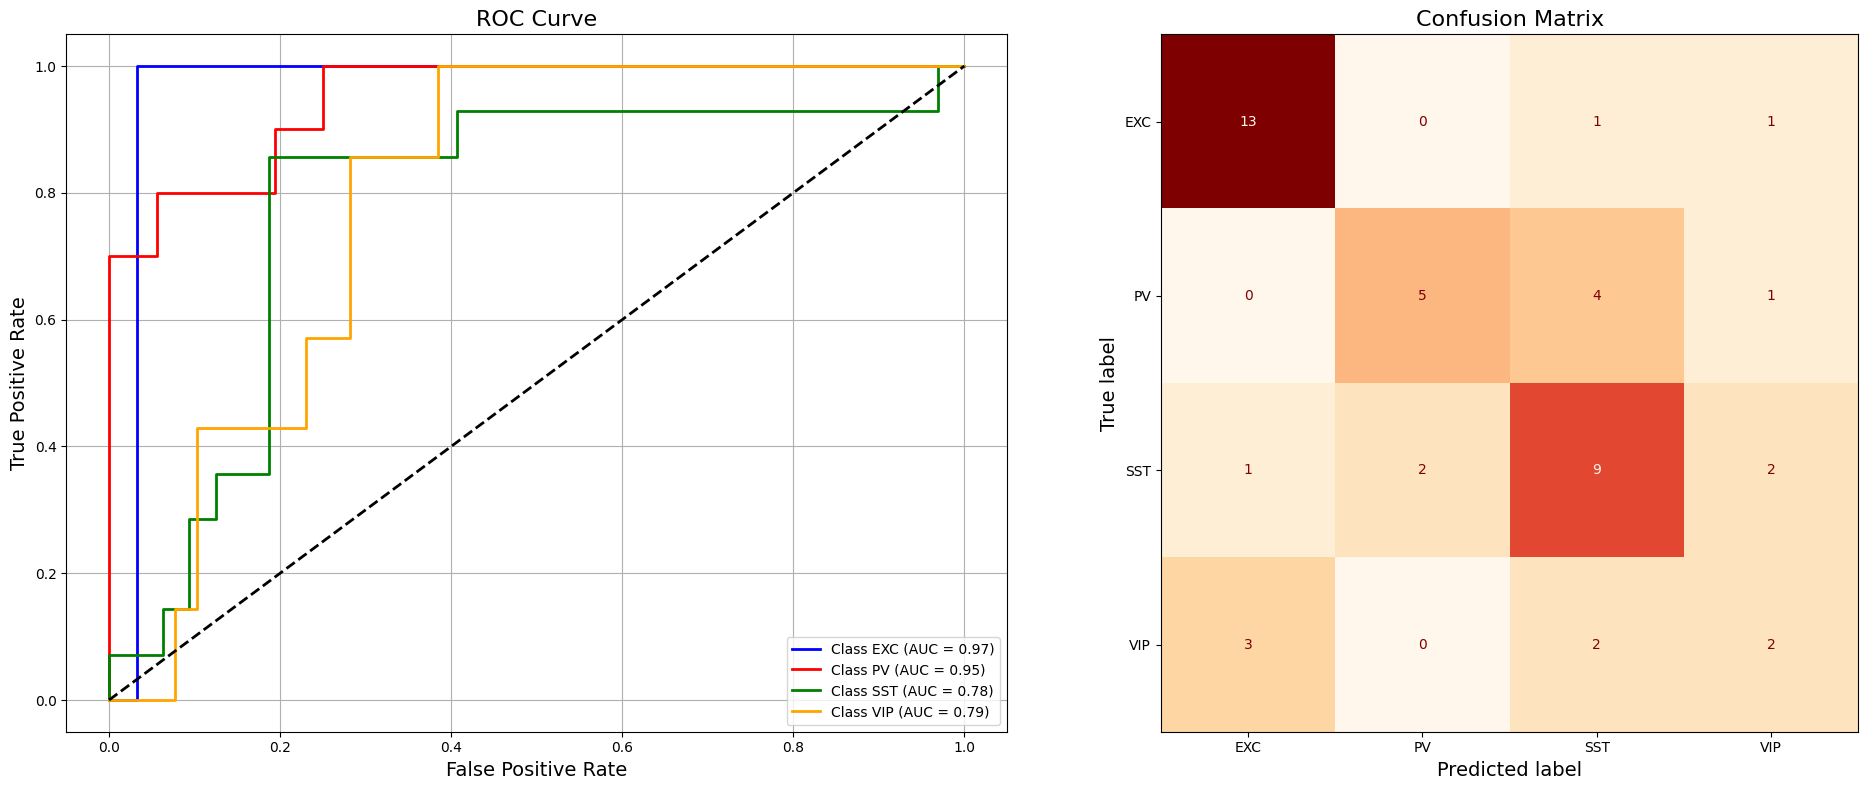

Macro-Averaged AUC: 0.87
Micro-Averaged AUC: 0.90


In [37]:
y_test_binarized = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
n_classes = y_test_binarized.shape[1]

y_score = model.predict_proba(X_test_scaled)

fpr = {}  
tpr = {}  
roc_auc = {}  

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

colors = ['blue', 'red', 'green', 'orange']
for i in range(n_classes):
    axes[0].plot(fpr[i], tpr[i], color=colors[i], lw=2,
                 label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")
axes[0].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0].set_title("ROC Curve", fontsize=16)
axes[0].set_xlabel("False Positive Rate", fontsize=14)
axes[0].set_ylabel("True Positive Rate", fontsize=14)
axes[0].legend(loc="lower right")
axes[0].grid()

# Sous-plot 2 : Matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(ax=axes[1], cmap='OrRd', colorbar=False)
axes[1].set_title("Confusion Matrix", fontsize=16)
axes[1].set_xlabel("Predicted label", fontsize=14)
axes[1].set_ylabel("True label", fontsize=14)

# Ajuster les espacements
plt.tight_layout()
plt.show()

# Afficher les scores macro et micro AUC
macro_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr", average="macro")
micro_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr", average="micro")
print(f"Macro-Averaged AUC: {macro_auc:.2f}")
print(f"Micro-Averaged AUC: {micro_auc:.2f}")


In [38]:
model.coef_

array([[-1.18077166,  0.83824614,  1.81966215, -1.24253836, -0.41529038,
         0.49736651, -0.05964218,  0.01437899, -0.39787551, -0.25620565,
        -0.09167837, -0.08864623,  0.11852314],
       [ 1.26185762, -0.16663067, -1.78925987, -0.16253457, -0.146592  ,
         0.14932061,  1.34685292, -0.00359105,  0.36157153,  0.21675569,
        -0.22802182,  0.1447074 , -0.04258185],
       [-0.68075875, -0.45170277, -0.94124021,  0.99970897,  0.11174162,
        -0.87049887, -0.0198691 ,  0.21113883, -0.29026132,  0.08122305,
         0.09413173,  0.37026305, -0.39728726],
       [ 0.59967279, -0.2199127 ,  0.91083793,  0.40536396,  0.45014075,
         0.22381174, -1.26734164, -0.22192677,  0.32656529, -0.04177309,
         0.22556846, -0.42632421,  0.32134597]])

In [39]:
coef_df = pd.DataFrame(model.coef_, columns=X.columns, index=label_encoder.classes_).T

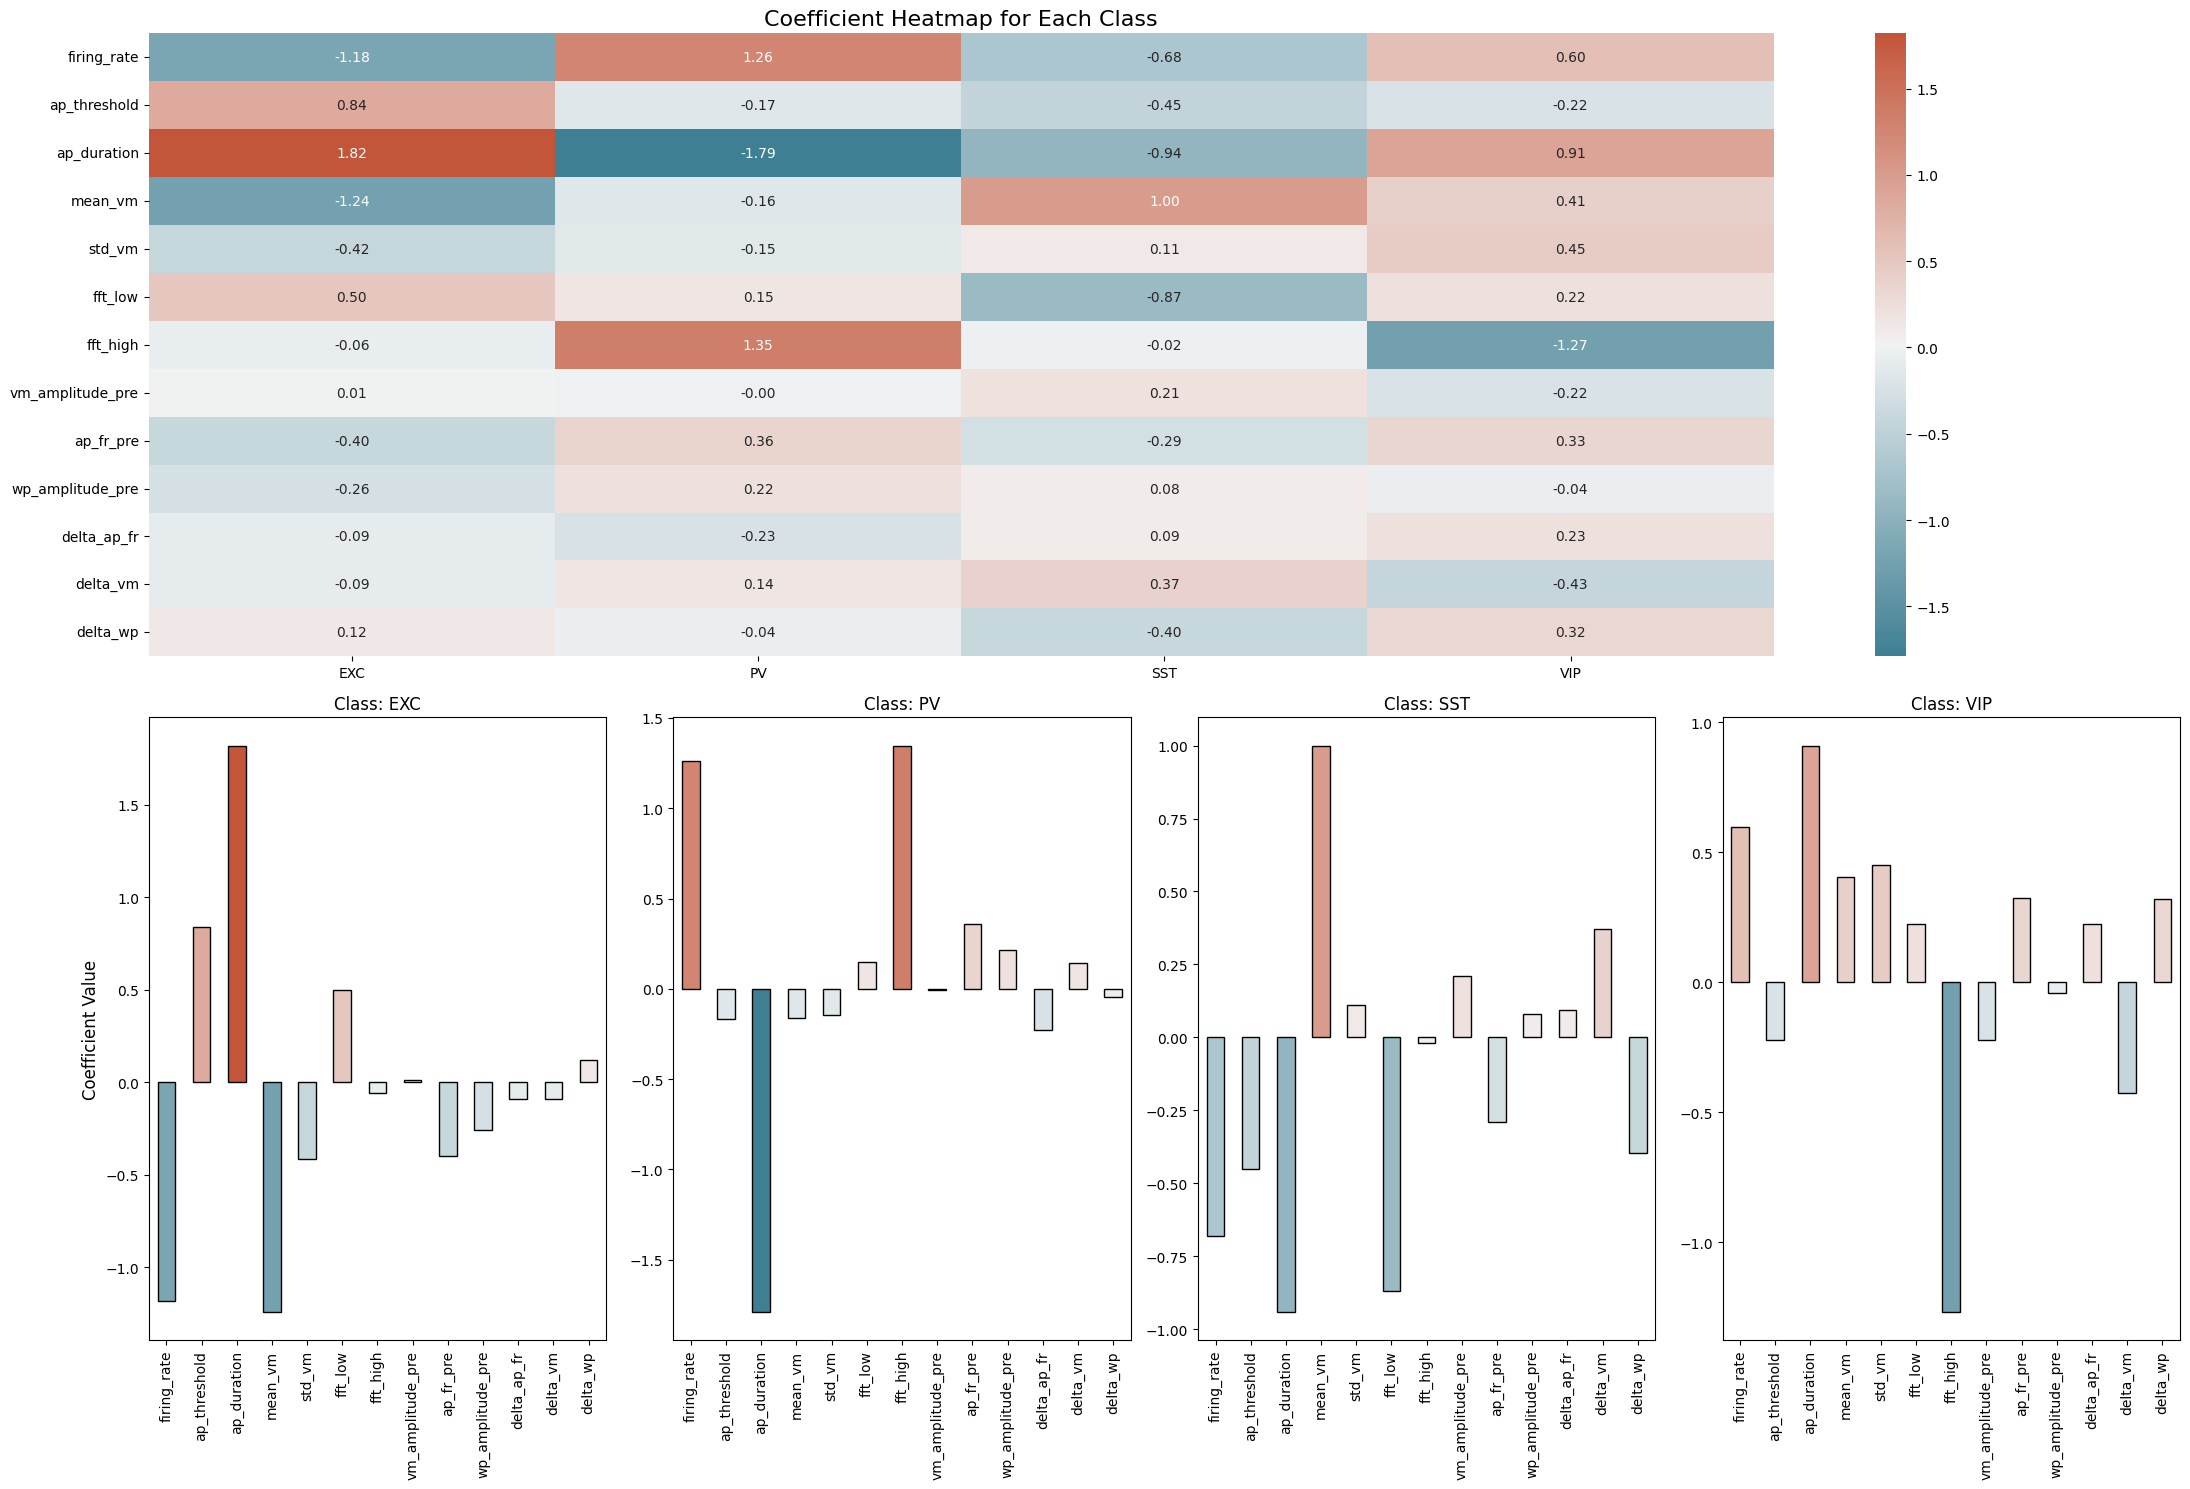

In [ ]:
classes = coef_df.columns
n_classes = len(classes)


fig = plt.figure(figsize=(22, 15))


ax1 = plt.subplot(2, 1, 1) 
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(coef_df, annot=True, cmap=cmap, fmt=".2f", ax=ax1)
ax1.set_title('Coefficient Heatmap for Each Class', fontsize=16)

norm = plt.Normalize(vmin=coef_df.min().min(), vmax=coef_df.max().max()) 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)


ax2 = [plt.subplot(2, n_classes, n_classes + i + 1) for i in range(n_classes)]

for i, ax in enumerate(ax2):
    values = coef_df[classes[i]].values
    colors = [sm.to_rgba(value) for value in values] 
    coef_df[classes[i]].plot(kind='bar', ax=ax, color=colors, edgecolor='black')
    ax.set_title(f'Class: {classes[i]}', fontsize=12)
    if i == 0:
        ax.set_ylabel('Coefficient Value', fontsize=12)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



### **Logistic Regression for binary classification : EXC, INH (==> PV,SST,VIP)**

In [ ]:
data = subthresh_motor_nocontact_data.copy()
X = data.dropna(axis=0)
y = X['cell_type_x']
y = y.where(y == 'EXC', 'INH')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X = X.drop(columns=['cell_id', 'cell_type_x', 'cell_type_y']) 


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 polynomial expansion
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test Accuracy: 0.9783

Classification Report:
              precision    recall  f1-score   support

         EXC       0.94      1.00      0.97        15
         INH       1.00      0.97      0.98        31

    accuracy                           0.98        46
   macro avg       0.97      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



/Users/lilly-flore/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


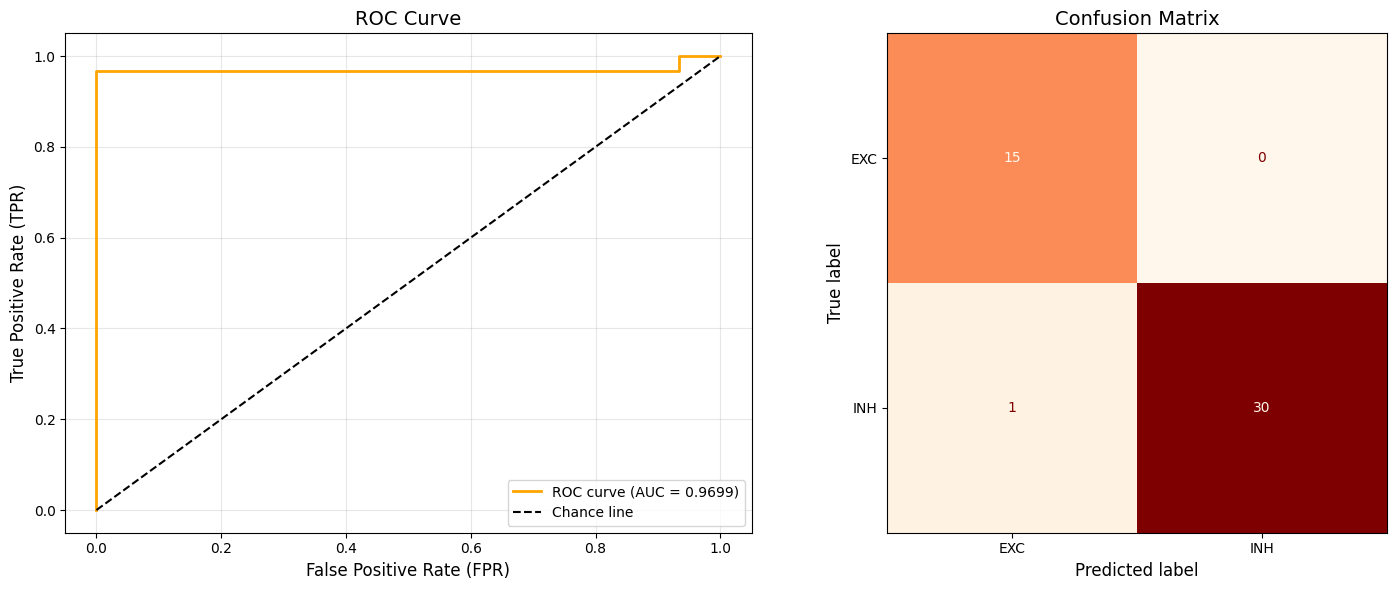

In [42]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
cm = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})', linewidth=2, color = "orange")
axes[0].plot([0, 1], [0, 1], 'k--', label='Chance line')  # Ligne de hasard
axes[0].set_title('ROC Curve', fontsize=14)
axes[0].set_xlabel('False Positive Rate (FPR)', fontsize=12)
axes[0].set_ylabel('True Positive Rate (TPR)', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(ax=axes[1], cmap='OrRd', colorbar=False)
axes[1].set_title('Confusion Matrix', fontsize=14)
axes[1].set_xlabel('Predicted label', fontsize=12)
axes[1].set_ylabel('True label', fontsize=12)

plt.tight_layout()
plt.show()




In [43]:
model.coef_.squeeze()

array([ 0.8780399 , -0.65950206, -0.9875331 ,  0.94499724,  0.31939053,
       -0.38382968, -0.0698502 , -0.01089991,  0.2261481 ,  0.14082196,
        0.07167167,  0.10501927, -0.07292156])

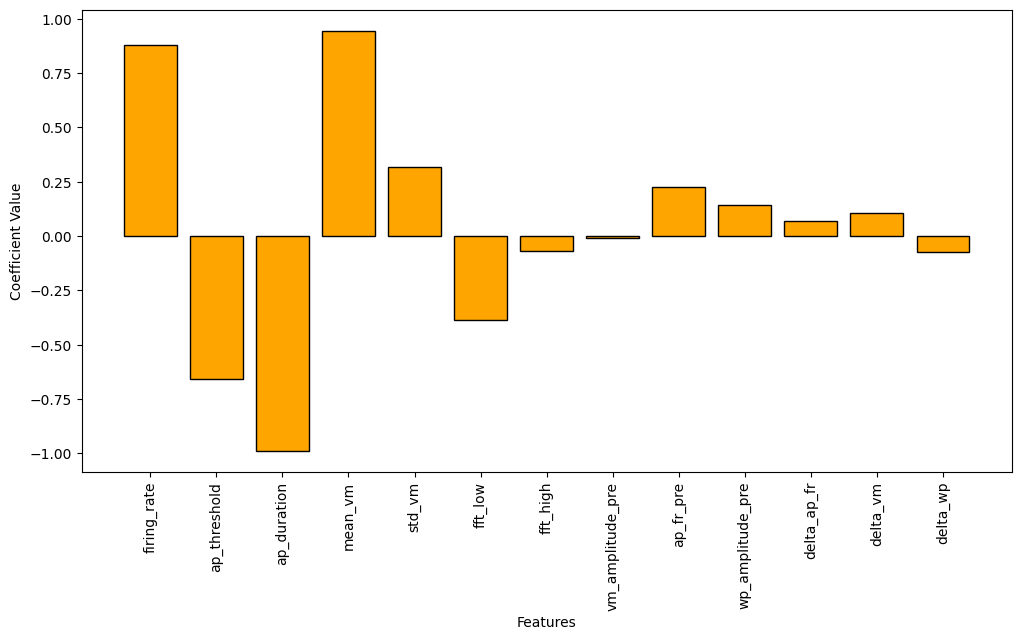

In [44]:


coefficients = model.coef_.squeeze()
plt.figure(figsize=(12, 6))
plt.bar(list(X.columns), coefficients, color="orange", edgecolor='black')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Coefficient Value')
plt.show()



==> on peut deja dire que model linaire est deja tres performant pour differencier EXC de INH. Les features les plus discriminantes sont celles des propriété sub-threshold (==> exp 1 ou ils avaient retiré les APs). Rien que avec un model linéaire entrainé sur les data de 200 neurones on arrive a avoir un model robuste. On peut essayer de juste utiliser Feature de exp1


Pour la multi-classification on peut explorer d'autres modèles comme random forest ou desicions tree....

In [ ]:

data = subthresh_motor_nocontact_data.copy()
X = data.dropna(axis=0)
y = X['cell_type_x']
X = X.drop(columns=['cell_id', 'cell_type_x', 'cell_type_y']) 
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


rf_predictions = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

dt_model = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_model.fit(X_train_scaled, y_train)

dt_predictions = dt_model.predict(X_test_scaled)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.70      0.82        10
           2       0.67      0.86      0.75        14
           3       0.33      0.14      0.20         7

    accuracy                           0.76        46
   macro avg       0.71      0.67      0.67        46
weighted avg       0.74      0.76      0.73        46

Random Forest Accuracy: 0.7608695652173914
Random Forest Confusion Matrix:
[[15  0  0  0]
 [ 0  7  2  1]
 [ 1  0 12  1]
 [ 2  0  4  1]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.70      0.70      0.70        10
           2       0.56      0.64      0.60        14
           3       0.67      0.57      0.62         7

    accuracy                           0.72        46
   macro avg       0.71     

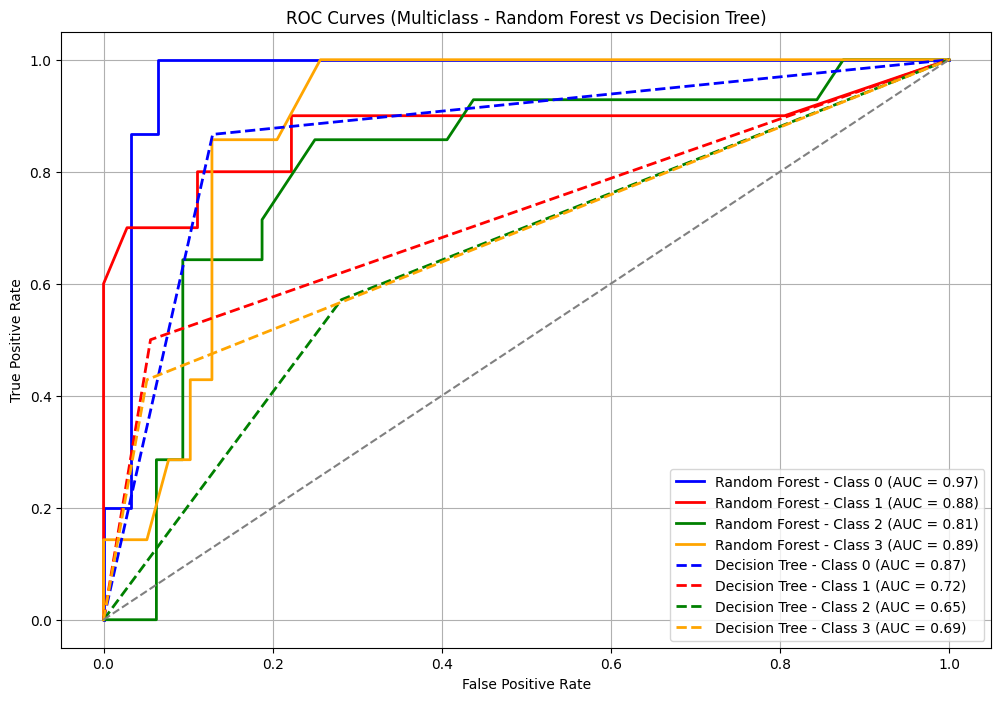

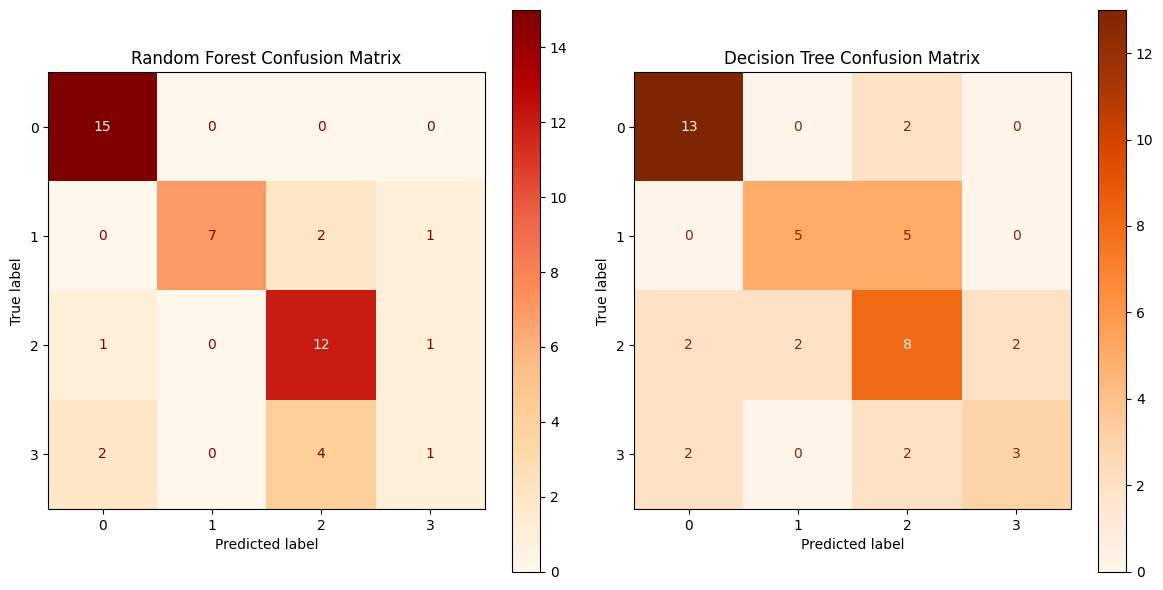

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Binarize the output
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Initialize the plot
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']  # Add more colors if needed

# Random Forest ROC Curves
for i in range(y_test_binarized.shape[1]):  # One curve for each class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], rf_model.predict_proba(X_test_scaled)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, linestyle='-', 
             label=f'Random Forest - Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

# Decision Tree ROC Curves
for i in range(y_test_binarized.shape[1]):  # One curve for each class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], dt_model.predict_proba(X_test_scaled)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, linestyle='--', 
             label=f'Decision Tree - Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title('ROC Curves (Multiclass - Random Forest vs Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test, ax=ax[0], cmap="OrRd")
ax[0].set_title('Random Forest Confusion Matrix')

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test_scaled, y_test, ax=ax[1], cmap="Oranges")
ax[1].set_title('Decision Tree Confusion Matrix')

plt.tight_layout()
plt.show()

